
--- Decision Tree Results ---
R² Score: 0.21440546842328612
MAE: 3.1629694431618463
RMSE: 3.9711152032419474


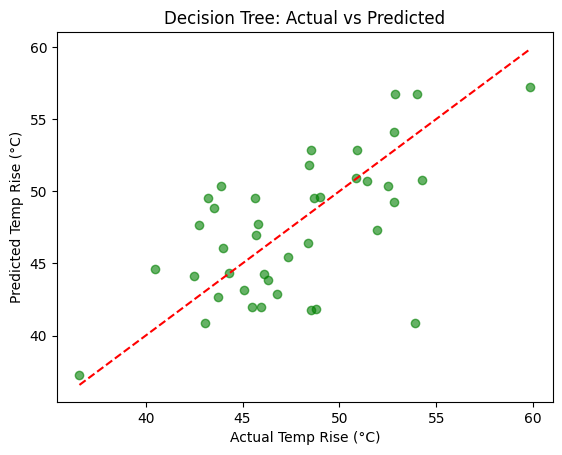


Predicted Temperature Rise for new data: 53.196392110977506 °C


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Step 1: Synthetic Dataset
np.random.seed(42)
n_samples = 200

voltage = np.random.uniform(200, 250, n_samples)
current = np.random.uniform(5, 15, n_samples)
ambient_temp = np.random.uniform(20, 35, n_samples)
load = np.random.uniform(50, 100, n_samples)
running_time = np.random.uniform(10, 120, n_samples)

temp_rise = (
    0.05 * voltage +
    0.8 * current +
    0.6 * ambient_temp +
    0.1 * load +
    0.07 * running_time +
    np.random.normal(0, 2, n_samples)
)

df = pd.DataFrame({
    "Voltage": voltage,
    "Current": current,
    "AmbientTemp": ambient_temp,
    "Load": load,
    "RunningTime": running_time,
    "TempRise": temp_rise
})


# Step 2: Train/Test Split

X = df[["Voltage", "Current", "AmbientTemp", "Load", "RunningTime"]]
y = df["TempRise"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 3: Decision Tree Model

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)


# Step 4: Predictions & Evaluation

y_pred = tree_model.predict(X_test)

print("\n--- Decision Tree Results ---")
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


# Step 5: Visualization

plt.scatter(y_test, y_pred, color="green", alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle="--")
plt.xlabel("Actual Temp Rise (°C)")
plt.ylabel("Predicted Temp Rise (°C)")
plt.title("Decision Tree: Actual vs Predicted")
plt.show()


# Step 6: Predict for New Data

new_data = pd.DataFrame({
    "Voltage": [230],
    "Current": [10],
    "AmbientTemp": [30],
    "Load": [80],
    "RunningTime": [60]
})

predicted_temp = tree_model.predict(new_data)
print("\nPredicted Temperature Rise for new data:", predicted_temp[0], "°C")